In [161]:
library("gvlma")
library("dplyr")
library("ggplot2")
library("tidyverse")
library("glmnet")
library("data.table")
library("repr")
library("viridis")
library("corrplot")

In [162]:
df <- read.csv("datos_temprt.csv")
str(df)

'data.frame':	108464 obs. of  15 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 $ Cruise     : Factor w/ 180 levels "99-0           ",..: 29 29 29 29 29 29 29 29 29 29 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Day        : int  15 15 15 15 15 15 15 15 15 15 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Year       : int  1981 1981 1981 1981 1981 1981 1981 1981 1981 1981 ...
 $ Institute  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Instrument : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Device     : Factor w/ 5 levels "CTD","MBT","OSD",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Sospechoso : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...


In [230]:
dfT <- fread("datos_temprt.csv", select = c("Temperature", "Ts", "Depth", "Latitude", "Longitude", "Month",  "Cast"))
str(dfT)
summary(dfT)

Classes 'data.table' and 'data.frame':	108464 obs. of  7 variables:
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 - attr(*, ".internal.selfref")=<externalptr> 


  Temperature          Ts             Depth           Latitude    
 Min.   :-2.24   Min.   : 9.176   Min.   :   0.0   Min.   :18.20  
 1st Qu.: 9.24   1st Qu.:19.063   1st Qu.: 118.4   1st Qu.:21.01  
 Median :14.68   Median :20.375   Median : 290.3   Median :22.18  
 Mean   :15.79   Mean   :21.389   Mean   : 351.0   Mean   :21.88  
 3rd Qu.:22.32   3rd Qu.:23.615   3rd Qu.: 508.0   3rd Qu.:23.07  
 Max.   :31.50   Max.   :30.162   Max.   :1990.8   Max.   :23.55  
   Longitude          Month             Cast         
 Min.   :-87.55   Min.   : 1.000   Min.   : 2702452  
 1st Qu.:-86.62   1st Qu.: 5.000   1st Qu.: 3078053  
 Median :-86.35   Median : 7.000   Median : 7332785  
 Mean   :-86.39   Mean   : 7.362   Mean   : 8233858  
 3rd Qu.:-86.11   3rd Qu.:11.000   3rd Qu.:10302115  
 Max.   :-85.88   Max.   :12.000   Max.   :18900411  

In [307]:
#Matriz de correlación  
dfcorr <-cor(dfd)

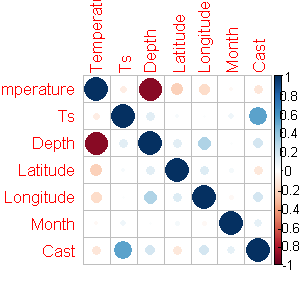

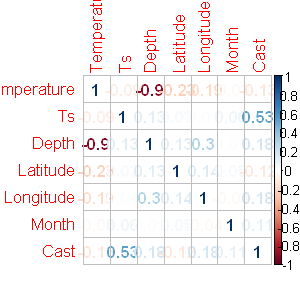

In [308]:
#Grafica de correlación
corrplot(dfcorr, method="circle")
corrplot(dfcorr, method="number")

In [237]:
summary(dfT$Temperature)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -2.24    9.24   14.68   15.79   22.32   31.50 

In [281]:
cast<- length(unique(df$Cast))

cast

[1] 1168

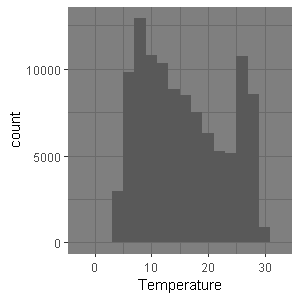

In [280]:
ggplot(data = dfT) +
  geom_histogram(mapping = aes(x = Temperature), binwidth = 2) + theme_dark()

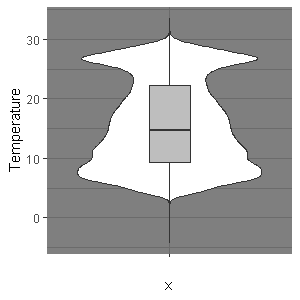

In [240]:
vp <- ggplot( dfT, aes(group = TRUE, x = "", y = Temperature)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

### Temperatura Superficial

In [306]:
cat("Resumen estadístico de variable predictora")
summary(dfd$Ts)
cat("Correlación de variable predictora Ts con variable de respuesta")
cor(dfd$Temperature, dfd$Ts)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.176  19.035  20.315  21.199  23.043  30.162 

Correlación de variable predictora Ts con variable de respuesta

[1] -0.09043981

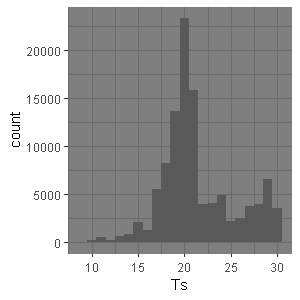

In [166]:
options(repr.plot.width= 3, repr.plot.height= 3, repr.plot.res = 100)
ggplot(data = dfT) +
  geom_histogram(mapping = aes(x = Ts), binwidth = 1) + theme_dark()

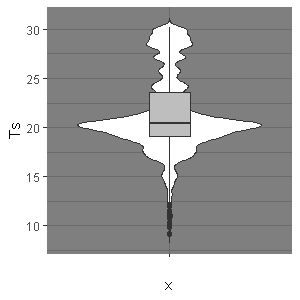

In [265]:
vp <- ggplot( dfT, aes(group = TRUE, x = "", y = Ts)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


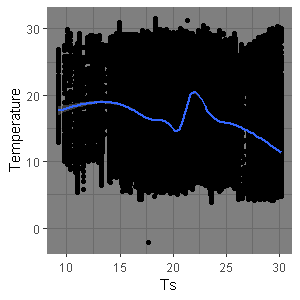

In [269]:
ggplot(data = dfT, mapping = aes(Ts, Temperature)) + geom_point() + geom_smooth() + theme_dark()

### Variable predictora Depth

In [303]:
#hacemos una versión filtrada sin profundidades de más de 1000m
dfm <- dfT
dfd <- dfm[dfm$Depth <= 1000, ] 
str(dfd)

Classes 'data.table' and 'data.frame':	105405 obs. of  7 variables:
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [302]:
cat("Resumen estadístico de variable predictora")
summary(dfd$Depth)
cat("Correlación de variable predictora Depth con variable de respuesta")
cor(dfd$Depth, dfd$Temperature)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   113.1   279.0   319.4   484.6  1000.0 

Correlación de variable predictora Depth con variable de respuesta

[1] -0.9027644

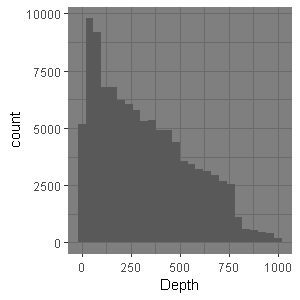

In [304]:
options(repr.plot.width= 3, repr.plot.height= 3, repr.plot.res = 100)
ggplot(data = dfd) + geom_histogram(mapping = aes(x = Depth), binwidth = 40) + theme_dark()

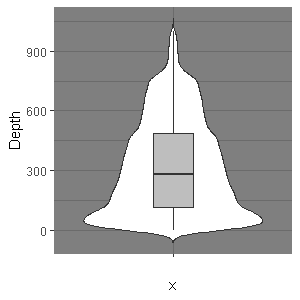

In [292]:
vp <- ggplot( dfd, aes(group = TRUE, x = "", y = Depth)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


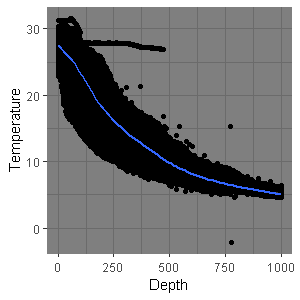

In [293]:
ggplot(data = dfd, mapping = aes(Depth, Temperature)) + geom_point() + geom_smooth() + theme_dark()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


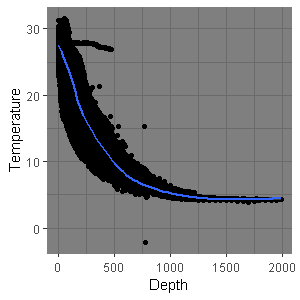

In [294]:
ggplot(data = dfT, mapping = aes(Depth, Temperature)) + geom_point() + geom_smooth() + theme_dark()

In [299]:
reg <- lm(Temperature ~ Ts + Depth + Latitude + Longitude  + Month , data = dfT)
summary(reg)
reg2 <- lm(Temperature ~ Ts + Depth + Latitude + Longitude  + Month , data = dfd)
summary(reg2)


Call:
lm(formula = Temperature ~ Ts + Depth + Latitude + Longitude + 
    Month, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8985 -2.7628 -0.7294  2.3352 24.0693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.029e+02  3.141e+00   64.60   <2e-16 ***
Ts           1.309e-01  2.952e-03   44.36   <2e-16 ***
Depth       -2.179e-02  4.184e-05 -520.86   <2e-16 ***
Latitude    -1.050e+00  8.401e-03 -125.02   <2e-16 ***
Longitude    1.836e+00  3.601e-02   51.00   <2e-16 ***
Month       -8.754e-02  3.518e-03  -24.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.762 on 108458 degrees of freedom
Multiple R-squared:  0.7404,	Adjusted R-squared:  0.7404 
F-statistic: 6.187e+04 on 5 and 108458 DF,  p-value: < 2.2e-16



Call:
lm(formula = Temperature ~ Ts + Depth + Latitude + Longitude + 
    Month, data = dfd)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5790 -2.1466 -0.1585  2.1338 15.1392 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.341e+02  2.434e+00   96.17   <2e-16 ***
Ts           5.521e-02  2.306e-03   23.94   <2e-16 ***
Depth       -2.839e-02  4.031e-05 -704.31   <2e-16 ***
Latitude    -7.049e-01  6.795e-03 -103.75   <2e-16 ***
Longitude    2.250e+00  2.791e-02   80.63   <2e-16 ***
Month       -2.837e-02  2.731e-03  -10.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.895 on 105399 degrees of freedom
Multiple R-squared:  0.8397,	Adjusted R-squared:  0.8397 
F-statistic: 1.105e+05 on 5 and 105399 DF,  p-value: < 2.2e-16


In [309]:
dfT <-dfd

### Variable predictora Latitude

In [310]:
cat("Resumen estadístico de variable predictora")
summary(dfT$Latitude)
cat("Correlación de variable predictora Latitude con variable de respuesta")
cor(dfT$Latitude, dfT$Temperature)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.20   21.04   22.23   21.93   23.07   23.55 

Correlación de variable predictora Latitude con variable de respuesta

[1] -0.2304958

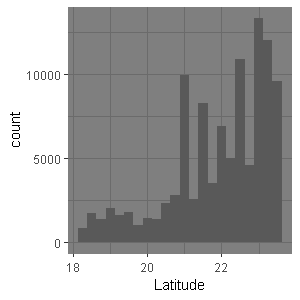

In [311]:
ggplot(data = dfT) + geom_histogram(mapping = aes(x = Latitude), binwidth = 0.25) + theme_dark()

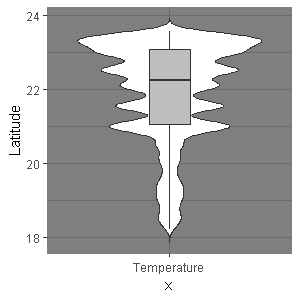

In [314]:
vp <- ggplot( dfT, aes(group = TRUE, x = "Temperature", y = Latitude)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


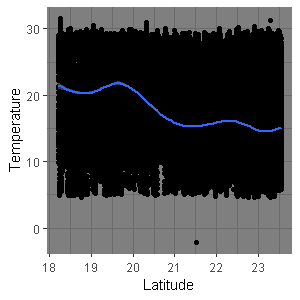

In [313]:
ggplot(data = dfT, mapping = aes(Latitude, Temperature)) + geom_point() + geom_smooth() + theme_dark()

### Variable predictora Longitude

La primera variable es la longitud. Esta variable tiene una correlación muy baja respecto a la temperatura. Además, la distribución de la variable se encuentra sesgada. El boxplot nos permite visualizar que la variable contiene datos atípicos.


In [195]:
cat("Resumen estadístico de variable predictora")
summary(dfT$Longitude)
cat("Correlación de variable predictora Longitud con variable de respuesta")
cor(dfT$Longitude, dfT$Temperature)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -87.55  -86.62  -86.35  -86.39  -86.11  -85.88 

Correlación de variable predictora Longitud con variable de respuesta

[1] -0.2218469

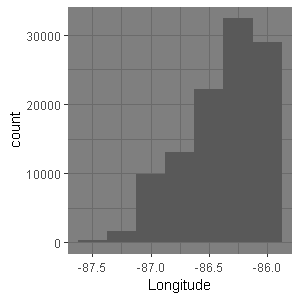

In [275]:
ggplot(data = dfT) + geom_histogram(mapping = aes(x = Longitude), binwidth = 0.25) + theme_dark()

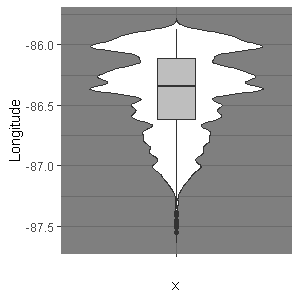

In [276]:
vp <- ggplot( dfT, aes(group = TRUE, x = "", y = Longitude)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


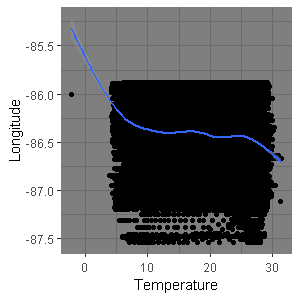

In [282]:
ggplot(data = dfT, mapping = aes(Temperature, Longitude)) + geom_point() + geom_smooth() + theme_dark()

### Variable predictora Month

In [283]:
cat("Resumen estadístico de variable predictora")
summary(dfT$Month)
cat("Correlación de variable predictora Month con variable de respuesta")
cor(dfT$Month, dfT$Temperature)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   7.000   7.362  11.000  12.000 

Correlación de variable predictora Month con variable de respuesta

[1] -0.003338407

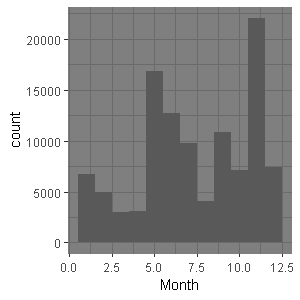

In [213]:
ggplot(data = dfT) + geom_histogram(mapping = aes(x = Month), binwidth = 1) + theme_dark()

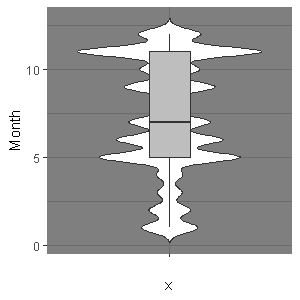

In [279]:
vp <- ggplot( dfT, aes(group = TRUE, x = "", y = Month)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


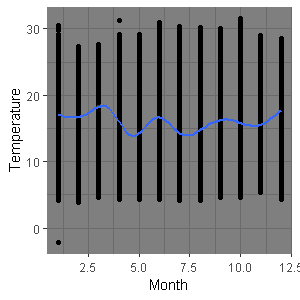

In [270]:
ggplot(data = dfT, mapping = aes(Month, Temperature)) + geom_point() + geom_smooth() + theme_dark()

In [322]:
head(unique(dfT$Cast))

[1]  3678873  3679613  3679603  3681827  3681828 10268672

In [402]:
#Checamos los cast por los meses en los que hicieron más 
d_cast <- dfT[dfT$Month == 6 ]
head(d_cast)

Temperature,Ts,Depth,Latitude,Longitude,Month,Cast
27.71,17.71216,24,22.32,-86.18,6,2714792
27.34,17.71216,36,22.32,-86.18,6,2714792
25.61,17.71216,53,22.32,-86.18,6,2714792
25.14,17.71216,64,22.32,-86.18,6,2714792
23.80,17.71216,75,22.32,-86.18,6,2714792
22.83,17.71216,89,22.32,-86.18,6,2714792


### Exploración de Cast aleatorios en diferentes meses

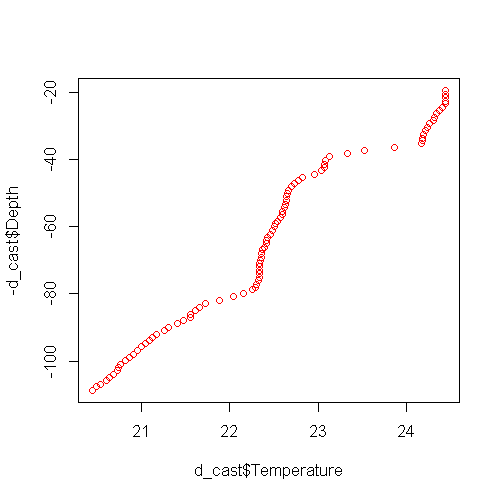

In [400]:
d_cast <- dfT[dfT$Cast == 16574861, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

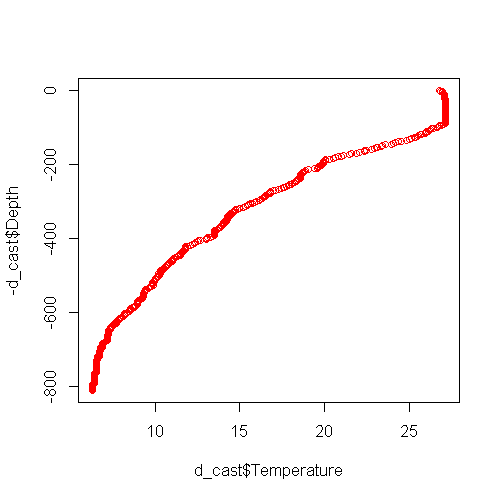

In [332]:
d_cast <- dfT[dfT$Cast == 10270602, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

### cast aleatorios en mes 5

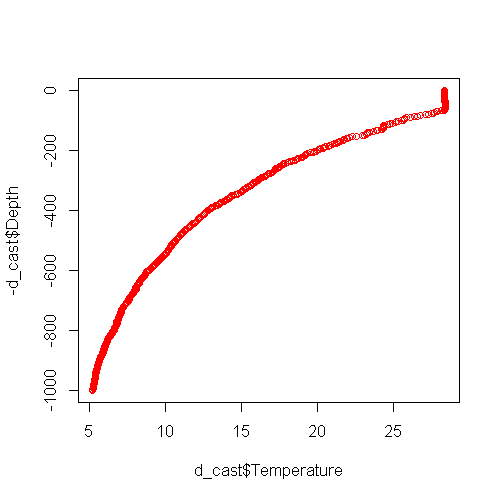

In [334]:
d_cast <- dfT[dfT$Cast == 18825534, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

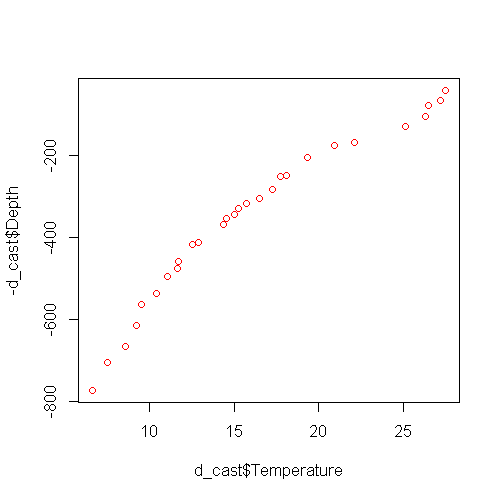

In [335]:
d_cast <- dfT[dfT$Cast == 2711106, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

In [ ]:
### Cast aleatorios en mes 

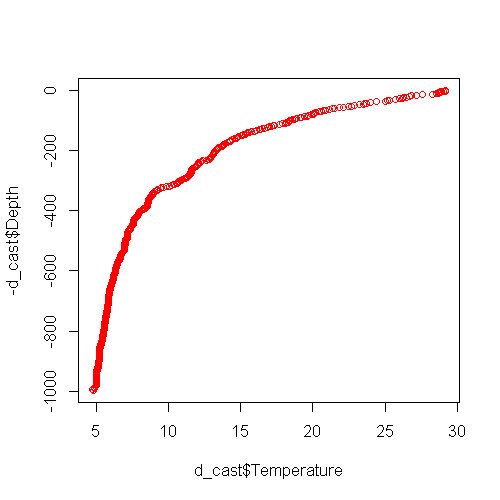

In [337]:
d_cast <- dfT[dfT$Cast == 18868505, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

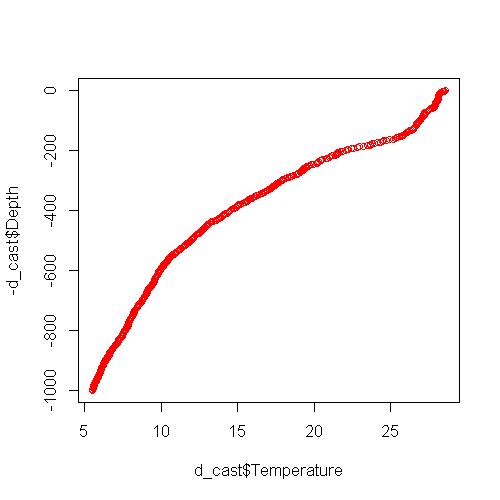

In [341]:
d_cast <- dfT[dfT$Cast == 18838718, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

In [ ]:
err_test <- c()
deg <- c()
for(d in 1:10){
  reg <- lm(Trans.Temp(Temperature) ~ X + Y + poly(Z, d, raw = T) + X*Y + Y*Z + X*Y*Z + m + ts, data = df_train)
  test_pred <- predict(reg, df_test)
  err <- sum(test_pred - df_test$Temperature)^2  
  err_test <- c(err_test, err)
  deg <- c(deg, d)
}

In [401]:
## Modelo 0 
mod0 <- lm(Temperature ~ Ts + Depth + Latitude + Longitude + Month + Cast, data = dfT)
summary(mod0)



Call:
lm(formula = Temperature ~ Ts + Depth + Latitude + Longitude + 
    Month + Cast, data = dfT)

Residuals:
   Min     1Q Median     3Q    Max 
-8.695 -2.131 -0.188  2.122 14.987 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  2.428e+02  2.489e+00   97.549   <2e-16 ***
Ts           7.945e-02  2.740e-03   28.992   <2e-16 ***
Depth       -2.833e-02  4.045e-05 -700.325   <2e-16 ***
Latitude    -7.295e-01  6.951e-03 -104.948   <2e-16 ***
Longitude    2.348e+00  2.851e-02   82.361   <2e-16 ***
Month       -2.326e-02  2.745e-03   -8.473   <2e-16 ***
Cast        -3.470e-08  2.126e-09  -16.322   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.892 on 105398 degrees of freedom
Multiple R-squared:  0.8402,	Adjusted R-squared:  0.8401 
F-statistic: 9.233e+04 on 6 and 105398 DF,  p-value: < 2.2e-16


In [403]:
vif(mod0)

Ts     Depth  Latitude Longitude     Month      Cast 
 1.445087  1.136825  1.082352  1.167975  1.021135  1.560352

In [371]:
library(caret)

In [378]:
# Define training control
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(Temperature ~., data = dfT, method = "lm",
               trControl = train.control)
# Summarize the results
print(model)

Linear Regression 

105405 samples
     6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 94864, 94865, 94864, 94864, 94866, 94865, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  2.891659  0.8401605  2.360145

Tuning parameter 'intercept' was held constant at a value of TRUE


In [379]:
summary(model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-8.695 -2.131 -0.188  2.122 14.987 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  2.428e+02  2.489e+00   97.549   <2e-16 ***
Ts           7.945e-02  2.740e-03   28.992   <2e-16 ***
Depth       -2.833e-02  4.045e-05 -700.325   <2e-16 ***
Latitude    -7.295e-01  6.951e-03 -104.948   <2e-16 ***
Longitude    2.348e+00  2.851e-02   82.361   <2e-16 ***
Month       -2.326e-02  2.745e-03   -8.473   <2e-16 ***
Cast        -3.470e-08  2.126e-09  -16.322   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.892 on 105398 degrees of freedom
Multiple R-squared:  0.8402,	Adjusted R-squared:  0.8401 
F-statistic: 9.233e+04 on 6 and 105398 DF,  p-value: < 2.2e-16


Warning message in spreadLevelPlot.lm(r):
"
1069 negative fitted values removed"


Suggested power transformation:  0.771433 


Call:
lm(formula = Temperature ~ Depth, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7900 -2.1619  0.0661  2.3357 15.0565 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.500e+01  1.618e-02  1545.2   <2e-16 ***
Depth       -2.781e-02  4.081e-05  -681.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.111 on 105403 degrees of freedom
Multiple R-squared:  0.815,	Adjusted R-squared:  0.815 
F-statistic: 4.643e+05 on 1 and 105403 DF,  p-value: < 2.2e-16


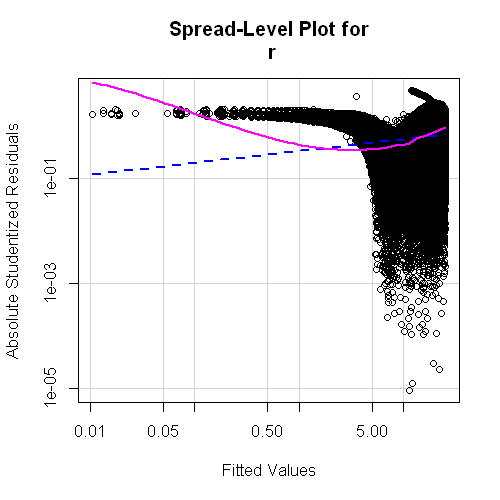

In [355]:
library("car")
r <- lm(Temperature ~ Depth, data = dfT)
spreadLevelPlot(r)
summary(r)

In [361]:
lmp <- lm(Temperature ~ Ts + Depth + Latitude + Longitude + Month + Cast, data = dfT)
summary(lmp)


Call:
lm(formula = Temperature ~ Ts + Depth + Latitude + Longitude + 
    Month + Cast, data = dfT)

Residuals:
   Min     1Q Median     3Q    Max 
-8.695 -2.131 -0.188  2.122 14.987 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  2.428e+02  2.489e+00   97.549   <2e-16 ***
Ts           7.945e-02  2.740e-03   28.992   <2e-16 ***
Depth       -2.833e-02  4.045e-05 -700.325   <2e-16 ***
Latitude    -7.295e-01  6.951e-03 -104.948   <2e-16 ***
Longitude    2.348e+00  2.851e-02   82.361   <2e-16 ***
Month       -2.326e-02  2.745e-03   -8.473   <2e-16 ***
Cast        -3.470e-08  2.126e-09  -16.322   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.892 on 105398 degrees of freedom
Multiple R-squared:  0.8402,	Adjusted R-squared:  0.8401 
F-statistic: 9.233e+04 on 6 and 105398 DF,  p-value: < 2.2e-16


In [364]:
lmp <- lm((Temperature^0.771433 ) ~ Ts + Depth + Latitude:Longitude + + Month , data = dfT)
summary(lmp)


Call:
lm(formula = (Temperature^0.771433) ~ Ts + Depth + Latitude:Longitude + 
    Month, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4362 -0.8483  0.0142  0.8545  6.1335 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.761e+01  6.105e-02  288.47   <2e-16 ***
Ts                  1.671e-02  9.099e-04   18.36   <2e-16 ***
Depth              -1.143e-02  1.520e-05 -751.73   <2e-16 ***
Month              -1.449e-02  1.077e-03  -13.46   <2e-16 ***
Latitude:Longitude  3.075e-03  3.093e-05   99.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.143 on 105399 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8515,	Adjusted R-squared:  0.8515 
F-statistic: 1.511e+05 on 4 and 105399 DF,  p-value: < 2.2e-16


#### Separamos muestras aleatorias de los datos para poder aplicar validación cruzada

In [391]:
cast<- unique(dfT$Cast)
size_cast <- length(cast)
# Obtenemos el 80% de los cast
s1 <- sample( 1:size_cast, 0.2*size_cast)

d_quitar <- cast[s1]
tamd_quitar <- length(d_quitar)
df_t<- dfT

for(i in 1:tamd_quitar){
    df_t <- df_t %>% filter(Cast != d_quitar[i])
}

# Obtenemos el 20% de los cast
s2 <- sample( 1:size_cast, 0.8*size_cast)
d_test <- cast[s2]
tamd_test <- length(d_test)

In [394]:
rc <- c()
for(d in 1:5){
 for (j in 1:10){
 reg1 <- lm(Temperature ~ poly(Depth,j, raw = T) + poly(Longitude,d,raw
= T) + poly(Latitude,d,raw = T), data = dfT)
 sr <- summary(reg1)
 #r2 <- c(r2,sr$r.squared)
 rc <- append(rc, sr$r.squared)
 }
}

In [393]:
str(d_test)

 int [1:934] 2784792 2882115 3067318 3699380 2849493 3083115 3679603 16572830 10270710 13342785 ...


In [343]:
ind <- sample(2, nrow(dfT), replace = TRUE, prob = c(0.8,0.2))

In [251]:
casts <- dfT %>% group_by(Cast) %>% tally(sort = TRUE) %>% pull(Cast)


In [380]:
# Separación de datos de entrenamiento y de prueba para validación cruzada
train <- casts[1:as.integer(length(casts) * 0.6)]
test <- casts[as.integer((length(casts) * 0.6) + 1):as.integer((length(casts) * 0.8))]
validation <- casts[as.integer((length(casts) * 0.8) + 1):length(casts)]

df_train <- dfT[Cast %in% train]
df_test <- dfT[Cast %in% test]
df_validation <- dfT[Cast %in% validation]

In [381]:
err_test <- c()
deg <- c()
for(poli in 1:10){

  mlr_poli2 <- lm(Trans.Temp(Temperature) ~ Longitude + poly(Latitude, poli, raw = T)  + Trans.Z(Z) + Longitude*Latitude + Latitude*Z + Longitude*Latitude*Z + m + ts, data = df_train)
  test_pred <- predict(mlr_poli2, df_test)
  err <- sum(test_pred - df_test$Temperature)^2  
  err_test <- c(err_test, err)
  deg <- c(deg, poli)
}


ERROR: Error in Trans.Z(Z): no se pudo encontrar la función "Trans.Z"


La primera transformación se aplica sobre la temperatura. Como el modelo presenta heterocedasticidad, entonces aplicamos la ráiz a los datos de la temperatura, restando el valor mínimo a cada observación para eliminar los datos negativos y no tener raíces imaginarias.

In [407]:


## Con esta transformación, logramos subir la r-cuadrada a 0.7882.

# Primera transformación: Raíz de Temperatura (Para la heterocedasticidad)
Trans.Temp <- function(Temperature) { return (sqrt(Temperature - min(Temperature))) }
reg <- lm(Trans.Temp(Temperature) ~ Ts + Depth + Latitude + Longitude + Month, data = dfT)
summary(reg)


Call:
lm(formula = Trans.Temp(Temperature) ~ Ts + Depth + Latitude + 
    Longitude + Month, data = dfT)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.77179 -0.21001  0.00226  0.21089  1.72440 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  3.045e+01  2.523e-01  120.705   <2e-16 ***
Ts           4.260e-03  2.390e-04   17.827   <2e-16 ***
Depth       -3.428e-03  4.177e-06 -820.630   <2e-16 ***
Latitude    -7.626e-02  7.041e-04 -108.309   <2e-16 ***
Longitude    2.726e-01  2.892e-03   94.265   <2e-16 ***
Month       -2.816e-03  2.829e-04   -9.952   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3 on 105399 degrees of freedom
Multiple R-squared:  0.8762,	Adjusted R-squared:  0.8762 
F-statistic: 1.492e+05 on 5 and 105399 DF,  p-value: < 2.2e-16


In [408]:
vif(reg)

Ts     Depth  Latitude Longitude     Month 
 1.020773  1.126237  1.031441  1.116531  1.007864

### Falta hacer para las demás variables y describir lo que se ve en las gráficas.

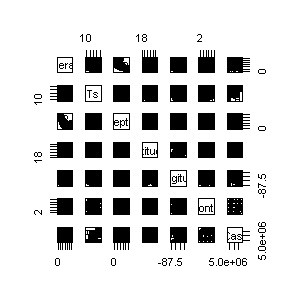

In [315]:
pairs(dfT)

### Se visualizan los cast respecto a las temperaturas tomadas en ese mismo registro

### Modelado estadístico 

Se aplica la regresión lineal múltiple sin transformaciones a las variables predictoras:

In [296]:
reg1 <- lm(Temperature ~ Ts + Depth + Latitude + Longitude  + Month , data = dfT)
summary(reg1)

plot(reg1$Coefficients)


Call:
lm(formula = Temperature ~ Ts + Depth + Latitude + Longitude + 
    Month, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8985 -2.7628 -0.7294  2.3352 24.0693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.029e+02  3.141e+00   64.60   <2e-16 ***
Ts           1.309e-01  2.952e-03   44.36   <2e-16 ***
Depth       -2.179e-02  4.184e-05 -520.86   <2e-16 ***
Latitude    -1.050e+00  8.401e-03 -125.02   <2e-16 ***
Longitude    1.836e+00  3.601e-02   51.00   <2e-16 ***
Month       -8.754e-02  3.518e-03  -24.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.762 on 108458 degrees of freedom
Multiple R-squared:  0.7404,	Adjusted R-squared:  0.7404 
F-statistic: 6.187e+04 on 5 and 108458 DF,  p-value: < 2.2e-16



Call:
lm(formula = Temperature ~ Ts + Depth + Latitude + Longitude + 
    Month, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5790 -2.1466 -0.1585  2.1338 15.1392 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.341e+02  2.434e+00   96.17   <2e-16 ***
Ts           5.521e-02  2.306e-03   23.94   <2e-16 ***
Depth       -2.839e-02  4.031e-05 -704.31   <2e-16 ***
Latitude    -7.049e-01  6.795e-03 -103.75   <2e-16 ***
Longitude    2.250e+00  2.791e-02   80.63   <2e-16 ***
Month       -2.837e-02  2.731e-03  -10.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.895 on 105399 degrees of freedom
Multiple R-squared:  0.8397,	Adjusted R-squared:  0.8397 
F-statistic: 1.105e+05 on 5 and 105399 DF,  p-value: < 2.2e-16


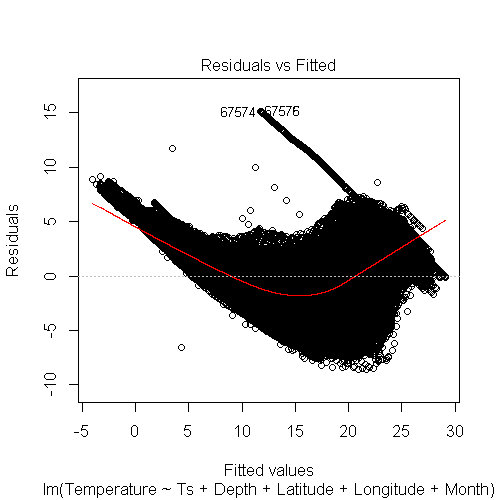

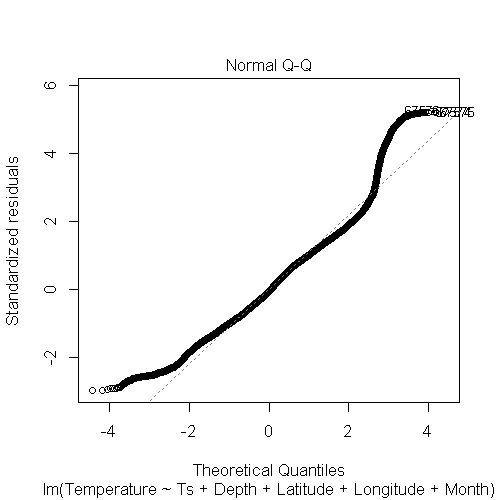

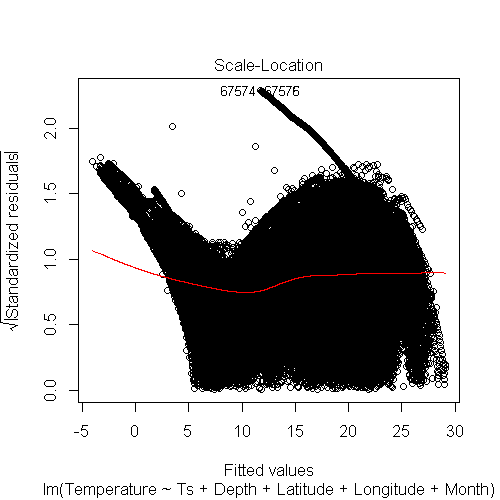

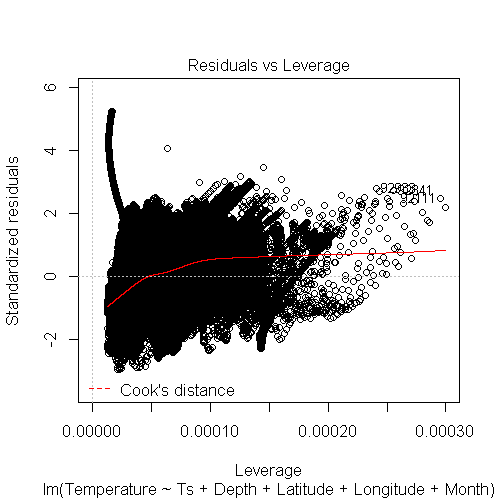

In [346]:
reg1 <- lm(Temperature ~ Ts + Depth + Latitude + Longitude  + Month , data = dfT)
summary(reg1)

plot(reg1)


Call:
lm(formula = Temperature ~ Ts + Depth + Longitude * Latitude + 
    Month, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9572 -2.0645 -0.1142  2.0502 15.0784 

Coefficients:
                     Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        -1.423e+03  3.200e+01  -44.452   <2e-16 ***
Ts                  5.861e-02  2.278e-03   25.729   <2e-16 ***
Depth              -2.836e-02  3.981e-05 -712.344   <2e-16 ***
Longitude          -1.688e+01  3.695e-01  -45.679   <2e-16 ***
Latitude            7.551e+01  1.468e+00   51.433   <2e-16 ***
Month              -6.598e-03  2.729e-03   -2.418   0.0156 *  
Longitude:Latitude  8.802e-01  1.696e-02   51.914   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.859 on 105398 degrees of freedom
Multiple R-squared:  0.8437,	Adjusted R-squared:  0.8437 
F-statistic: 9.485e+04 on 6 and 105398 DF,  p-value: < 2.2e-16


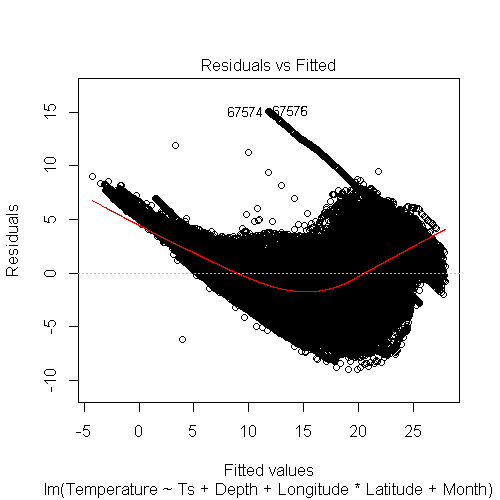

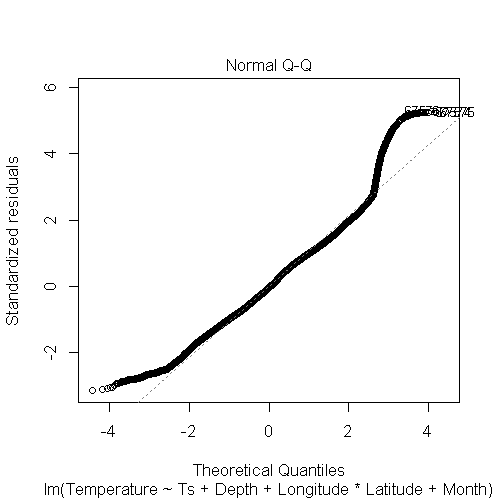

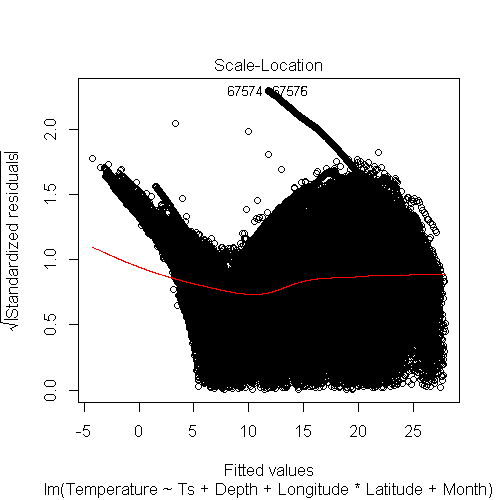

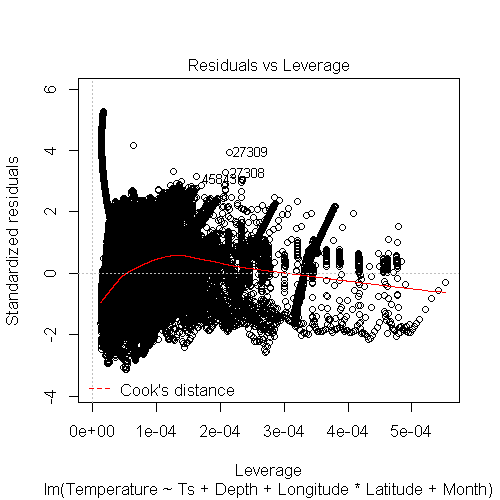

In [350]:
reg1 <- lm(Temperature ~ Ts + Depth + Longitude*Latitude + Month , data = dfT)
summary(reg1)

plot(reg1)

## Regresión lineal multiple sin modificar variables (Explicar las gráficas...)

Warning message in log(Temperature):
"Se han producido NaNs"


Call:
lm(formula = log(Temperature) ~ Ts + Depth + Latitude * Longitude + 
    Month, data = dfT)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59023 -0.08603  0.00944  0.08716  0.95675 

Coefficients:
                     Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        -6.358e+01  1.621e+00  -39.226  < 2e-16 ***
Ts                  5.704e-04  1.154e-04    4.943  7.7e-07 ***
Depth              -1.999e-03  2.017e-06 -991.447  < 2e-16 ***
Latitude            3.710e+00  7.436e-02   49.884  < 2e-16 ***
Longitude          -7.816e-01  1.872e-02  -41.761  < 2e-16 ***
Month               7.875e-05  1.382e-04    0.570    0.569    
Latitude:Longitude  4.328e-02  8.588e-04   50.396  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1448 on 105397 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9117,	Adjusted R-squared:  0.9117 
F-statistic: 1.814e+05 on 6 and 105397 DF,  p-

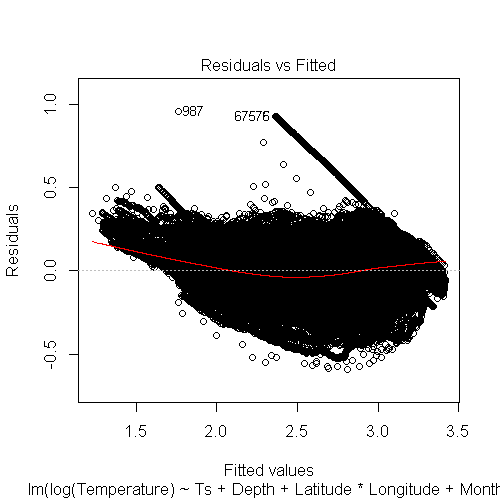

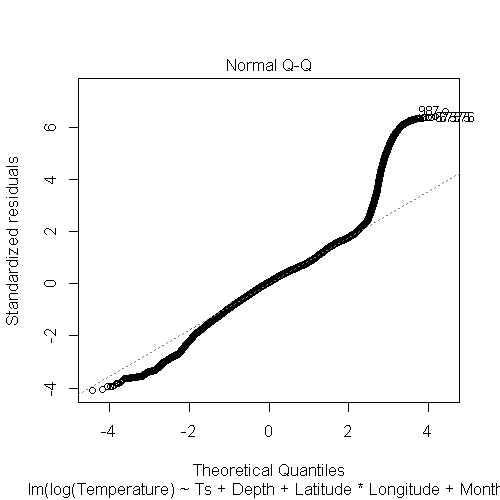

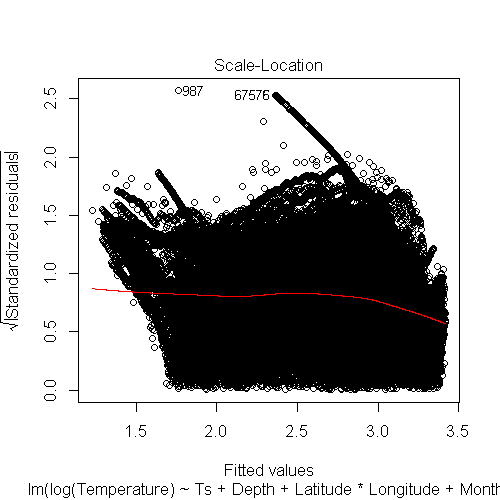

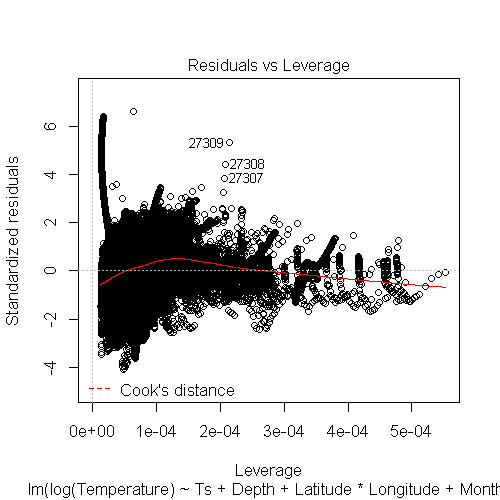

In [412]:
reg <- lm(log(Temperature) ~ Ts + Depth + Latitude*Longitude  + Month , data = dfT)
summary(reg)
plot(reg)

In [410]:
vif(reg)

Ts              Depth           Latitude          Longitude 
          1.021621           1.126513       49386.275320         200.709960 
             Month Latitude:Longitude 
          1.032240       48695.654135

# Sugerencias

* Considera explorar transformaciones polinomiales para la profundidad (variable $Depth$)
* Los polinomios de profundidad pueden depender de la latitud o de la longitud, por lo tanto, es recomendable que el modelo tenga términos de interacción entre las coordenadas geográficas y la profundidad.
* Determina la complejidad del modelo mediante validación cruzada (k-fold cross validation)
* Para la validación, puedes utilizar librerías especializadas de R: https://quantdev.ssri.psu.edu/tutorials/cross-validation-tutorial

base de datos con las variables de interés para el estudio, algunas de ellas fueron: 1) La temperatura que registró el dispositivo expresada en grados Celsius 2) La profundidad a la cual se tomó la medición expresada en metros, 3) La latitud y la longitud expresadas en el sistema de coordenadas geográficas WGS84, 4) La fecha de la medición (día, mes y año), 5) Tipo de instrumento de medición y  6) El promedio mensual de la temperatura superficial.